## Importamos librerías

In [1]:
# Importamos las librerias necesarias para realizar nuestro modelo de regresión lineal.

# Pandas para el manejo del dataframe
import pandas as pd

# Sklearn para el manejo del modelo y sus validaciones
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# MatplotLib para el manejo de la visualización
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scipy y Statsmodels para el manejo de unas validaciones
from scipy.stats import anderson
from statsmodels.stats.stattools import durbin_watson

## Obtenemos el dataframe

In [2]:
# Convertimos nuestro archivo .csv en un dataframe. Separamos los campos por medio del caracter ","
df = pd.read_csv('Regresion_lineal.csv', sep=',')

# Verificamos nuestro dataframe con el método head()
df.head()

,metro,precio
0,5,375
1,15,487
2,20,450
3,25,500
4,30,1227


## Observamos la distribución del dataframe

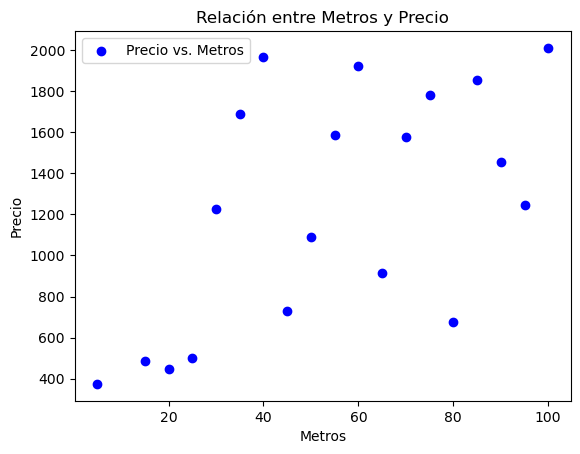

In [3]:
# Definimos el tipo de grafico que queremos observar del dataframe
plt.scatter(df['metro'], df['precio'], label='Precio vs. Metros', color='blue', marker='o')

# Agregamos las etiquetas de los ejes y título
plt.xlabel('Metros')
plt.ylabel('Precio')
plt.title('Relación entre Metros y Precio')

# Mostramos la leyenda
plt.legend()

# Mostramos el gráfico
plt.show()

## Creamos nuestros subconjuntos para el modelo

In [4]:
# Separamos el conjunto de datos en dependientes e independientes
X = df[["metro"]]
Y = df["precio"]

In [5]:
# Separamos los conjuntos anteriores en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
# Creamos nuestro modelo de regresión lineal
modelo = LinearRegression()

In [7]:
# Aplicamos el modelos al conjunto de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

In [8]:
# Aplicamos el modelo al conjunto de prueba
y_pred = modelo.predict(X_test)

## Obtenemos la información del modelo

In [9]:
# Obtenemos los parametros del modelo aplicado
coeficientes = modelo.coef_
intercepto = modelo.intercept_

print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

Coeficientes: [9.32450951]
Intercepto: 695.2349833987321


## Validamos el modelo

In [10]:
# Validamos la precisión de nuestro modelo con el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 178695.23463178403
Coeficiente de determinación (R^2): 0.5443954937886465


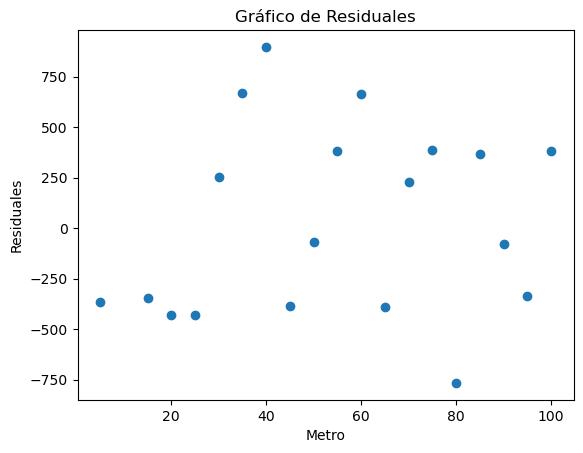

In [11]:
# Obtén los residuales del modelo
residuales = Y - modelo.predict(X)

# Crea un gráfico de dispersión de residuales
plt.scatter(df['metro'], residuales)
plt.xlabel('Metro')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')
plt.show()

In [12]:
# Realiza la prueba de normalidad de Anderson-Darling
resultado = anderson(residuales)

# Muestra el estadístico de prueba y los valores críticos
print('Estadístico de prueba:', resultado.statistic)
print('Valores críticos:', resultado.critical_values)

Estadístico de prueba: 0.6542775728963939
Valores críticos: [0.505 0.575 0.69  0.804 0.957]


In [13]:
# Calcula el estadístico de Durbin-Watson
dw_statistic = durbin_watson(residuales)

print('Estadístico de Durbin-Watson:', dw_statistic)

Estadístico de Durbin-Watson: 1.8979964849134567


## Análizamos la validación

**Error Cuadrático Medio (MSE):** El MSE es un indicador del error promedio entre las predicciones del modelo y los valores reales. En este caso, el MSE es bastante alto, lo cual sugiere que las predicciones del modelo tienen un error cuadrático medio significativo en relación con los valores reales. En otras palabras, el modelo no se ajusta bien a los datos y tiene dificultades para hacer predicciones precisas.

**Coeficiente de Determinación (R^2):** El coeficiente de determinación (R^2) mide la proporción de la varianza en la variable dependiente (en este caso, "precio") que es explicada por la variable independiente (en este caso, "metro"). Un valor de R^2 de 0.54 indica que aproximadamente el 54% de la variabilidad en los precios puede ser explicada por la variable "metro". Esto significa que el modelo tiene un poder explicativo limitado y no está capturando completamente la variabilidad en los datos.

**Prueba de normalidad Anderson-Darling:** La prueba de normalidad de Anderson-Darling que se realizó en los residuales indicó que hay evidencia significativa para rechazar la hipótesis nula de que los residuales son normalmente distribuidos. En otras palabras, los residuales no se ajustan bien a una distribución normal.

**Estadístico de Durbin-Watson:** El estadístico de Durbin-Watson está cerca de 2, lo que sugiere que no hay evidencia sustancial de autocorrelación serial en los residuales. Un valor cercano a 2 indica que los residuales no muestran una autocorrelación significativa. Esto es una buena noticia, ya que la autocorrelación en los residuales podría indicar que el modelo no está capturando adecuadamente la estructura de los datos en función del tiempo o el orden de las observaciones.

En resumen, los resultados del modelo de regresión que has proporcionado sugieren que el modelo no está funcionando de manera óptima. El alto valor del MSE y el valor moderado de R^2 indican que las predicciones del modelo no son muy precisas y que la variable "metro" por sí sola puede no ser suficiente para explicar los precios en el conjunto de datos. Es posible que se necesite considerar otros factores o una técnica de modelado diferente para mejorar la calidad de las predicciones del modelo.

**Nota:** La conclusión negativa del modelo se debe a que inicialmente teníamos un conjunto de datos muy limitado, que constaba de solo 5 observaciones. Para abordar esta limitación y realizar un análisis más robusto, se generaron adicionalmente 15 puntos de datos de manera aleatoria para enriquecer el conjunto de datos. Esto nos permitió obtener resultados más significativos y representativos en nuestras evaluaciones y conclusiones

## Conclusión

**Supuestos:** 
* El campo precio es referente a precio de una casa. 
* El campo metros es metros cuadrados de una casa.

Podemos concluir que nuestro modelo actual revela la presencia de variables ocultas que desempeñan un papel crucial en la predicción precisa de los precios de los inmuebles. Entre las variables importantes que podrían influir en el precio, se incluyen aspectos como la ubicación del inmueble, su antigüedad y, posiblemente, otros factores que aún no hemos considerado. Por lo tanto, para mejorar la capacidad predictiva de nuestro modelo, es esencial que exploremos y agreguemos estas variables relevantes a nuestro conjunto de datos. Esto nos permitirá obtener predicciones más precisas y útiles sobre los precios de los inmuebles en lugar de depender exclusivamente de la cantidad de metros cuadrados.